In [6]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import sys
sys.path.append('../..')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importe de Data 2024

In [7]:
df_2024 = pd.read_excel("../../Datos/datos_parquev/Parque Vehicular 2024.xlsx", sheet_name='2.3.1', skiprows=11, index_col=0)

In [8]:
df_2024.reset_index(drop=True, inplace=True)

df_2024.columns = [
    "Provincia", 
    "Automóviles", 
    "Autobuses", 
    "Jeep", 
    "Carga", 
    "Motocicletas", 
    "Volteo", 
    "Máquinas Pesadas", 
    "Otros", 
    "Total", 
    "Total %"
]

In [9]:
df_2024 = df_2024.iloc[1:34]
df_2024.reset_index(drop=True, inplace=True)
df_2024.columns = df_2024.columns.str.lower()

In [10]:
df_2024['total %'] = df_2024['total %'].round(2)

## Análisis Provincial

In [11]:
df_2024

,provincia,automóviles,autobuses,jeep,carga,motocicletas,volteo,máquinas pesadas,otros,total,total %
0,Azua,7627,1388,5150,6642,54179,338,132,143,75599.00,1.22
1,Bahoruco,2354,405,1397,1137,12046,98,22,23,17482.00,0.28
2,Barahona,6542,1092,5331,3974,44962,274,78,210,62463.00,1.01
3,Dajabón,2534,221,2518,2360,29377,117,134,58,37319.00,0.60
4,Distrito Nacional,458494,52861,249581,219411,808646,9960,12533,12436,1823922.00,29.45
5,Duarte,23843,2161,14455,13408,128358,525,1413,308,184471.00,2.98
6,El Seibo,2394,420,2337,2123,23195,131,106,45,30751.00,0.50
7,Elías Piña,1219,169,754,520,5087,41,29,5,7824.00,0.13
8,Espaillat,20507,1920,17294,13524,84947,606,279,279,139356.00,2.25
9,Hato Mayor,2598,492,2466,2227,24809,126,186,59,32963.00,0.53


In [12]:
df_2024.sort_values(by='total', ascending=False)[1:7]

,provincia,automóviles,autobuses,jeep,carga,motocicletas,volteo,máquinas pesadas,otros,total,total %
4,Distrito Nacional,458494,52861,249581,219411,808646,9960,12533,12436,1823922.00,29.45
30,Santo Domingo,270470,34561,148935,88738,449207,3358,3586,4526,1003381.00,16.20
28,Santiago,117359,8995,89912,52077,228875,2938,2032,2129,504317.00,8.14
14,La Vega,32300,2930,28126,22121,248451,1229,1526,579,337262.00,5.44
23,San Cristóbal,35432,4590,23836,16549,197433,1022,471,948,280281.00,4.53
12,La Altagracia,23622,5860,22811,14859,132432,1021,588,595,201788.00,3.26


In [13]:
df_2024[['provincia', 'total', 'total %']].sort_values(by='total', ascending=False)[1:7]

,provincia,total,total %
4,Distrito Nacional,1823922.00,29.45
30,Santo Domingo,1003381.00,16.20
28,Santiago,504317.00,8.14
14,La Vega,337262.00,5.44
23,San Cristóbal,280281.00,4.53
12,La Altagracia,201788.00,3.26


In [14]:
df_2024['total %'].sort_values(ascending=False)[1:6].sum()

np.float64(63.76)

En el top 5 de provincias se tiene el 60% de los vehiculos del pais.

In [15]:
columnas_int = df_2024.columns.tolist()
columnas_int = columnas_int[1:10]

In [16]:
df_2024[columnas_int] = df_2024[columnas_int].astype('int64')

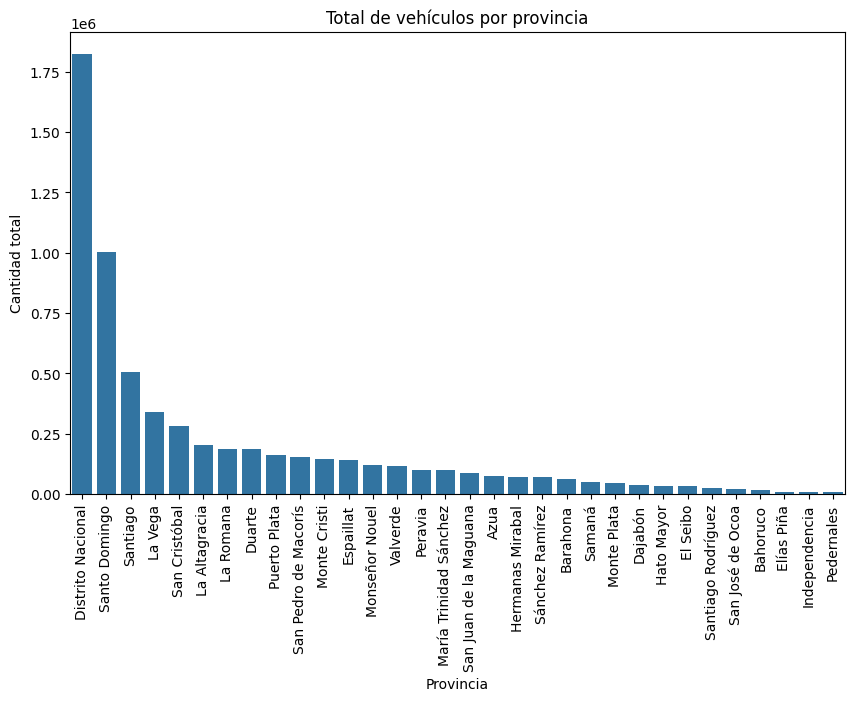

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y= 'total', data=df_2024[:-1], order=df_2024[:-1].sort_values(by='total', ascending=False)['provincia'])
plt.title('Total de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad total')
plt.xticks(rotation=90)
plt.show()

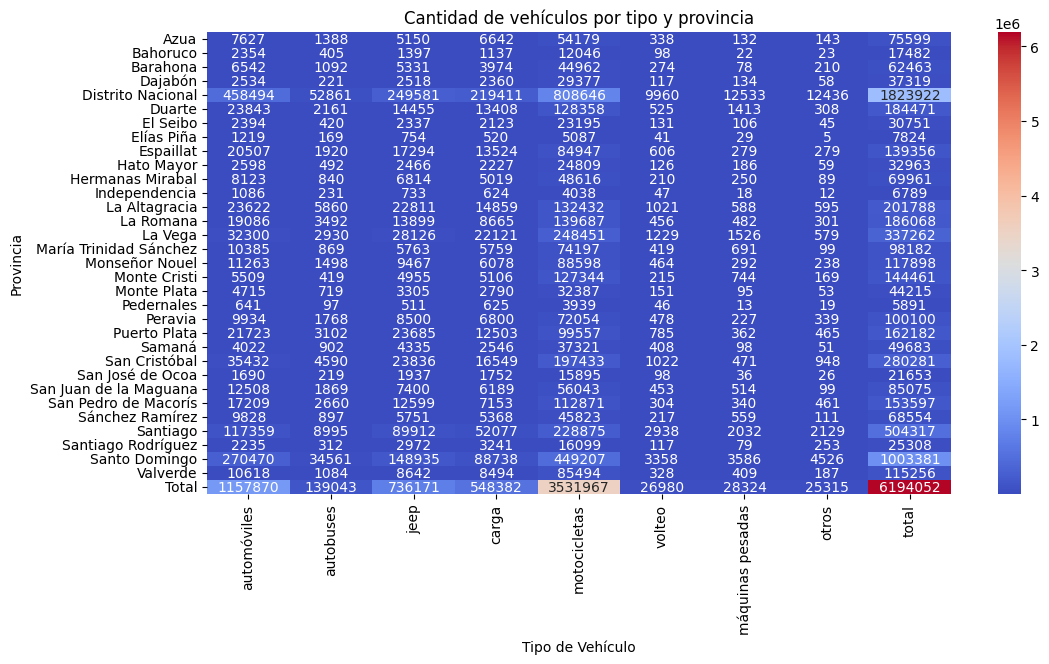

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_2024[columnas_int], annot=True, fmt='d', cmap='coolwarm', xticklabels=columnas_int, yticklabels=df_2024['provincia'])
plt.title('Cantidad de vehículos por tipo y provincia')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Provincia')
plt.show()

Vemos como el Distrito Nacional se eleve a 1.8 MM de vehículos de motor. Estamos hablando de que la provincia capital es la que mayor acumulación de transporte tiene, pero la pregunta es si esta provincia está preparada para este número de vehículos circulando.

Como podemos ver, se han mantenido las mismas provincias con los primeros lugares. Ocupando más del 60 % de los vehículos en apenas 5 provincias.

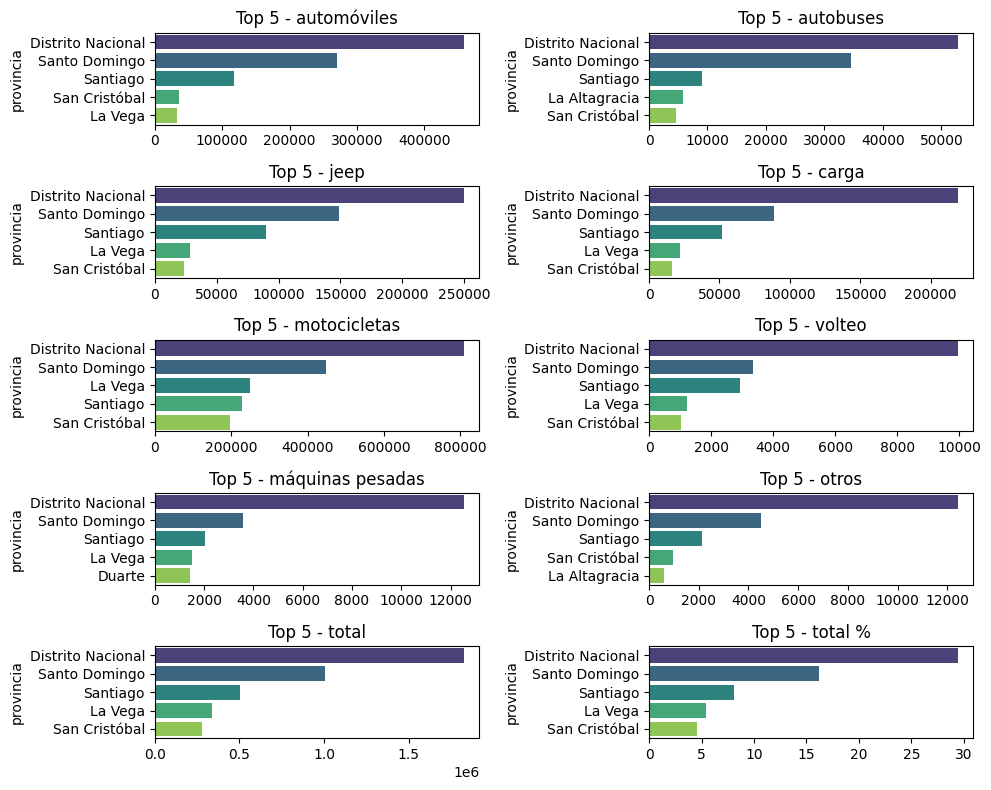

In [19]:
f.plot_top_numericas(dataframe=df_2024[:-1], columna_categoria='provincia', top_n=5)

In [20]:
columnas_int_sin_total = columnas_int[:8]

In [21]:
columnas_int_sin_total

['automóviles',
 'autobuses',
 'jeep',
 'carga',
 'motocicletas',
 'volteo',
 'máquinas pesadas',
 'otros']

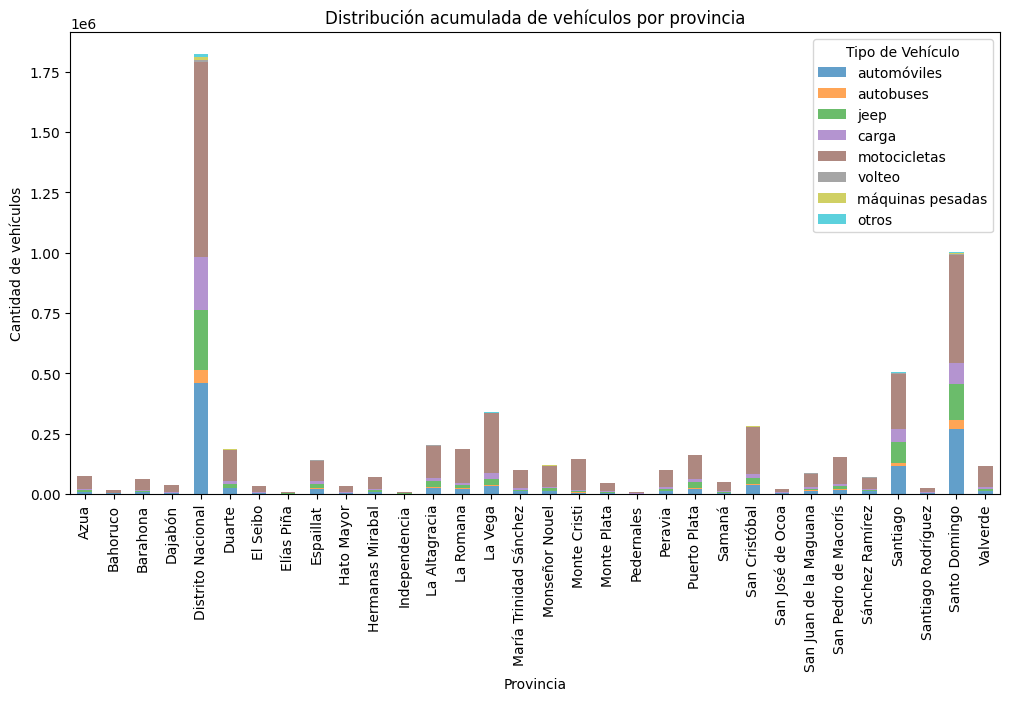

In [22]:
df_2024[:-1][columnas_int_sin_total].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10', alpha=0.7)
plt.title('Distribución acumulada de vehículos por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de vehículos')
plt.xticks(ticks=range(len(df_2024['provincia'][:-1])), labels=df_2024['provincia'][:-1], rotation=90)
plt.legend(title='Tipo de Vehículo')
plt.show()

## Distribución por género

In [23]:
df_genero = pd.read_excel("../../Datos/datos_parquev/Parque Vehicular 2024.xlsx", sheet_name='2.6', skiprows=7, index_col=0)
df_genero

,Unnamed: 1,Provincia,Género,Unnamed: 4,Total,Unnamed: 6,Unnamed: 7,Unnamed: 8,Provincia.1,Género.1,Unnamed: 11,Total.1
NaN,NaN,NaN,Femenino,Masculino,NaN,NaN,NaN,NaN,NaN,Femenino,Masculino,NaN
NaN,NaN,Azua,12340,55688,68028.00,NaN,NaN,NaN,Azua,0.18,0.82,1.00
NaN,NaN,Bahoruco,3303,12531,15834.00,NaN,NaN,NaN,Bahoruco,0.21,0.79,1.00
NaN,NaN,Barahona,10907,41383,52290.00,NaN,NaN,NaN,Barahona,0.21,0.79,1.00
NaN,NaN,Dajabón,6327,17379,23706.00,NaN,NaN,NaN,Dajabón,0.27,0.73,1.00
NaN,NaN,Distrito Nacional,257251.20,925498.50,1182749.70,NaN,NaN,NaN,Distrito Nacional,0.22,0.78,1.00
NaN,NaN,Duarte,34019,105379,139398.00,NaN,NaN,NaN,Duarte,0.24,0.76,1.00
NaN,NaN,El Seibo,7146,19047,26193.00,NaN,NaN,NaN,El Seibo,0.27,0.73,1.00
NaN,NaN,Elías Piña,1557,6125,7682.00,NaN,NaN,NaN,Elías Piña,0.20,0.80,1.00
NaN,NaN,Espaillat,26313,94136,120449.00,NaN,NaN,NaN,Espaillat,0.22,0.78,1.00


In [24]:
df_genero = df_genero[['Provincia', 'Género', 'Unnamed: 4', 'Total', 'Género.1', 'Unnamed: 11', 'Total.1']]

In [25]:
df_genero.columns = ['provincia', 'femenino', 'masculino', 'total', '%_fem', '%_masc', 'total_%']
df_genero = df_genero.iloc[1:33]

In [26]:
df_genero.reset_index(drop=True, inplace=True)
df_genero

,provincia,femenino,masculino,total,%_fem,%_masc,total_%
0,Azua,12340,55688,68028.00,0.18,0.82,1.00
1,Bahoruco,3303,12531,15834.00,0.21,0.79,1.00
2,Barahona,10907,41383,52290.00,0.21,0.79,1.00
3,Dajabón,6327,17379,23706.00,0.27,0.73,1.00
4,Distrito Nacional,257251.20,925498.50,1182749.70,0.22,0.78,1.00
5,Duarte,34019,105379,139398.00,0.24,0.76,1.00
6,El Seibo,7146,19047,26193.00,0.27,0.73,1.00
7,Elías Piña,1557,6125,7682.00,0.20,0.80,1.00
8,Espaillat,26313,94136,120449.00,0.22,0.78,1.00
9,Hato Mayor,8157,20298,28455.00,0.29,0.71,1.00


In [27]:
lista_int = df_genero.columns.tolist()[1:4]
lista_float = df_genero.columns.tolist()[4:]

In [28]:
df_genero[lista_int] = df_genero[lista_int].astype('int64')
df_genero[lista_float] = df_genero[lista_float].astype(float)
df_genero[lista_float] = df_genero[lista_float] * 100

In [29]:
df_genero.describe()

,femenino,masculino,total,%_fem,%_masc,total_%
count,32.00,32.00,32.00,32.00,32.00,32.00
mean,33011.38,107581.72,140593.12,23.86,76.14,100.00
std,53398.83,183634.35,236785.53,2.99,2.99,0.00
min,1337.00,4446.00,5783.00,18.14,71.33,100.00
25%,7904.25,19985.25,27889.50,21.66,73.31,100.00
50%,16192.00,57848.00,72570.00,24.00,76.00,100.00
75%,32431.00,96946.75,125186.25,26.69,78.34,100.00
max,257251.00,925498.00,1182749.00,28.67,81.86,100.00


In [30]:
min_valor_fem = df_genero['%_fem'].min()
df_genero[df_genero['%_fem'] == min_valor_fem]

,provincia,femenino,masculino,total,%_fem,%_masc,total_%
0,Azua,12340,55688,68028,18.14,81.86,100.00


Sigue existiendo una diferenciación muy clara en la presencia de dueños de vehículos por género. Los hombres dominan entre un 71 - 81% de los vehículos a nivel provincial mientras que las mujeres hacen presencia entre un 18 - 28%.

- La media de propiedad en manos de mujeres es de 23.8% de los vehiculos, mientras que los hombre tienen una media de 76%.

## Vehículos por categoría

In [31]:
df_2024_cat = pd.read_excel("../../Datos/datos_parquev/Parque Vehicular 2024.xlsx", sheet_name='2.4', skiprows=9)

In [32]:
df_2024_cat = df_2024_cat.iloc[1:11,2:8]

In [33]:
df_2024_cat = df_2024_cat[['Unnamed: 2', 'Unnamed: 7']]

In [34]:
df_2024_cat.columns = [
    'Tipo_Vehiculo',
    'Cantidad'
]

In [35]:
df_2024_cat['Tipo_Vehiculo'] = df_2024_cat['Tipo_Vehiculo'].str.replace(r'\d+/.*', '', regex=True).str.strip()

In [36]:
df_2024_cat = df_2024_cat.iloc[1:]

In [37]:
df_2024_cat.reset_index(inplace=True, drop=True)

In [38]:
df_2024_cat['Cantidad'] = df_2024_cat['Cantidad'].astype('int64')

In [39]:
df_2024_cat['Porcentaje'] = (df_2024_cat['Cantidad'] / df_2024_cat[df_2024_cat['Tipo_Vehiculo'] == 'Total']['Cantidad'].values[0]) * 100
df_2024_cat['Porcentaje'] = df_2024_cat['Porcentaje'].round(2)

In [40]:
df_2024_cat

,Tipo_Vehiculo,Cantidad,Porcentaje
0,Motocicletas,3531967,57.02
1,Automóviles,1157870,18.69
2,Jeep,736171,11.89
3,Carga,548382,8.85
4,Autobuses,139043,2.24
5,Máquinas Pesadas,28324,0.46
6,Volteo,26980,0.44
7,Otros,25315,0.41
8,Total,6194052,100.00


- Para el cierre de 2023, las motocicletas ocupaban el 56.47%, seguidos de autos (19.31%) y las jeepetas con 11.67%

- Para finales de 2024, las motocicletas ocpan el 57.02%, los autos 18.69% y las jeepetas 11.88€